# [Paired Sample t-test](https://app.pluralsight.com/ilx/video-courses/4b4cdb5a-b0b9-4c17-8e5c-9d9e07e522a0/cd386635-4bb8-4317-a87e-f944b673f5f9/a6d22abc-d149-4b8b-b596-647821495692)  

[Crime Datset](https://www.sheffield.ac.uk/mash/statistics/datasets)

The two-sample t-test has the following features:

- it works also with a small dataset as it is in this case
- the samples need not be normally distributed

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

# How to suppress Pandas Future warning?
# https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
crime_data = pd.read_csv('datasets/Crime_R.csv')
crime_data.head()

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
0,45.5,135,0,12.4,69,540,965,0,6,80,...,71,564,974,0,6,82,20,1,632,142
1,52.3,140,0,10.9,55,535,1045,1,6,135,...,54,540,1039,1,7,138,39,1,521,210
2,56.6,157,1,11.2,47,512,962,0,22,97,...,44,529,959,0,24,98,33,0,359,256
3,60.3,139,1,11.9,46,480,968,0,19,135,...,41,497,983,0,20,131,50,0,510,235
4,64.2,126,0,12.2,106,599,989,0,40,78,...,97,602,989,0,42,79,24,1,660,162


In [3]:
crime_data.shape

(47, 27)

In [4]:
crime_expenditure_0_10 = crime_data[['ExpenditureYear0','ExpenditureYear10']]
crime_expenditure_0_10.head()

,ExpenditureYear0,ExpenditureYear10
0,69,71
1,55,54
2,47,44
3,46,41
4,106,97


The following histograms show that the expenditure pro capita on police enforcement for each US state is not normally distributed - it is not bell-shaped. It shows instead that the \\$40 to \\$60 pro capita is the most frequent value, although this is a value on the lower end of the spectrum rather than the middle of the range as expected in the case of a normal distribution.

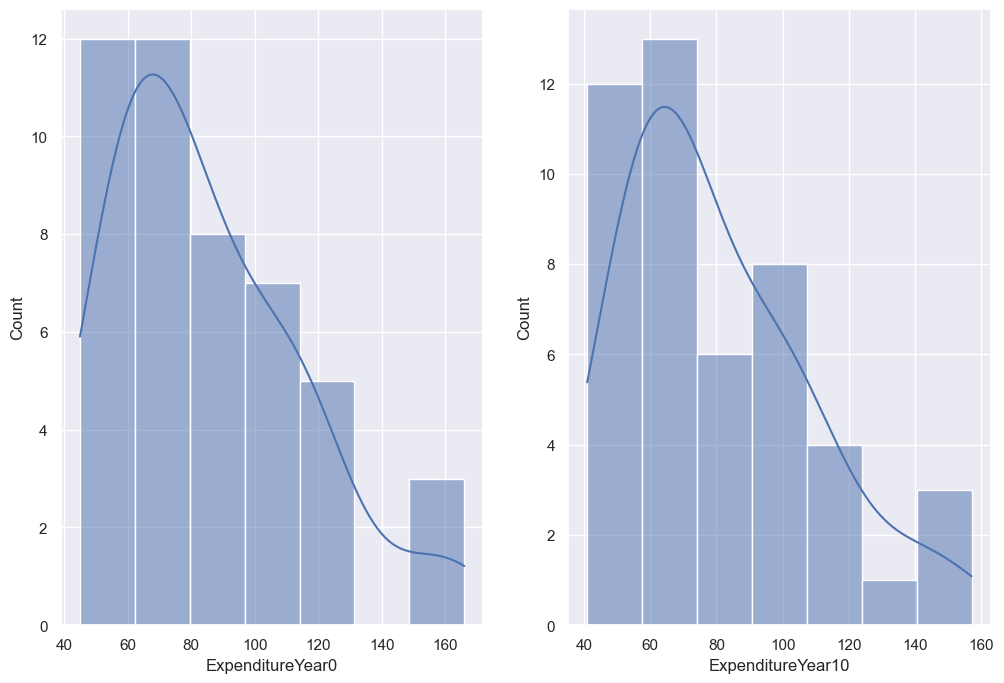

In [5]:
fig, axs = plt.subplots(figsize = (12,8), ncols=2)
sns.histplot(crime_data['ExpenditureYear0'], kde = True, ax = axs[0])
sns.histplot(crime_data['ExpenditureYear10'], kde = True, ax = axs[1])
plt.show()

Another way to show that the data is not normally distributed is to use a proplot with dist="norm" so that the data and a read line are displayed together in the same plot. The red line displays the theoretical normal distribution for data in the same range.
The data departs significantly from the red line, especially at the ends of the range.

((array([-2.17970694, -1.80519598, -1.583668  , -1.42038866, -1.28807506,
         -1.17512401, -1.07545654, -0.98546513, -0.90282096, -0.82592578,
         -0.75362993, -0.68507477, -0.61959872, -0.55667825, -0.49588925,
         -0.43688076, -0.37935657, -0.32306189, -0.26777354, -0.21329239,
         -0.15943751, -0.10604146, -0.05294626,  0.        ,  0.05294626,
          0.10604146,  0.15943751,  0.21329239,  0.26777354,  0.32306189,
          0.37935657,  0.43688076,  0.49588925,  0.55667825,  0.61959872,
          0.68507477,  0.75362993,  0.82592578,  0.90282096,  0.98546513,
          1.07545654,  1.17512401,  1.28807506,  1.42038866,  1.583668  ,
          1.80519598,  2.17970694]),
  array([ 45,  46,  47,  51,  55,  56,  57,  58,  58,  58,  61,  62,  63,
          63,  65,  66,  67,  69,  71,  72,  74,  75,  75,  78,  81,  82,
          82,  82,  87,  90,  90,  95,  97,  97, 103, 106, 109, 109, 113,
         115, 118, 121, 123, 128, 149, 160, 166], dtype=int64)),
 (29.41216

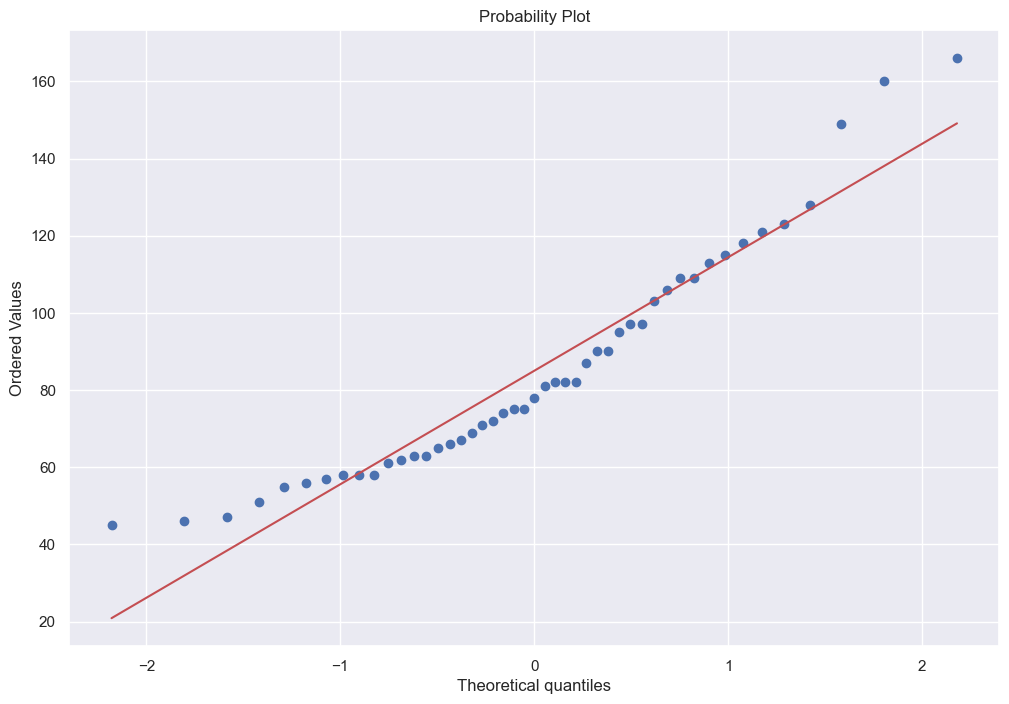

In [6]:
plt.figure(figsize = (12,8))
stats.probplot(crime_data['ExpenditureYear0'], dist = "norm", plot=plt)

The following **probability plots** show that neither the expenditure in year 0 nor year 10 fit the theoretical normal distribution for data in the same range displayed on the read line.

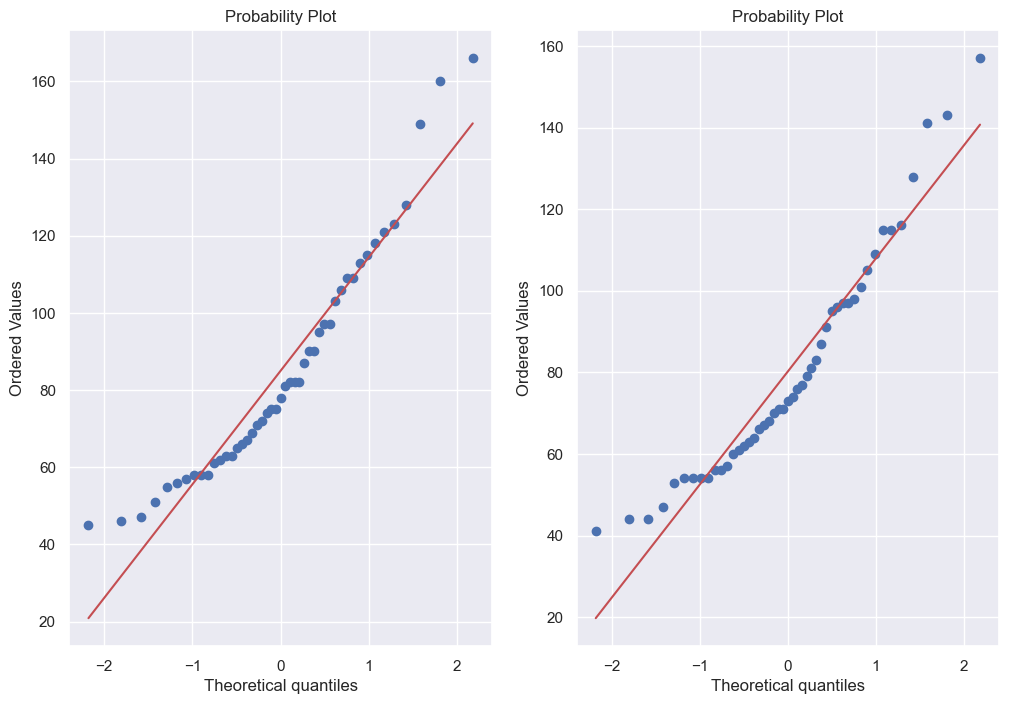

In [7]:
fig, axs = plt.subplots(figsize = (12,8), ncols=2)

# This is from the example above, where sns.histplot can use the axis to print the histogram to either column. 
#sns.histplot(crime_data['ExpenditureYear0'], kde = True, ax = axs[0])
#sns.histplot(crime_data['ExpenditureYear10'], kde = True, ax = axs[1])

# This works but prints only to the second column.
#stats.probplot(crime_data['ExpenditureYear0'], dist = "norm", plot=plt) 

# Plots from different packages side by side in Python
# https://stackoverflow.com/questions/61096689/plots-from-different-packages-side-by-side-in-python

stats.probplot(crime_data['ExpenditureYear0'], dist = "norm", plot=axs[0]) 
stats.probplot(crime_data['ExpenditureYear10'], dist = "norm", plot=axs[1]) 
plt.show()

The Shaphiro-Wilk test can be used to test for the normal distribution of data.    
H0: the data is normally distributed.  
H1: the data is not normally distributed. 

a p-value of 0.4% < 5% means that it is possible to reject the null hypothesis H0 as it is unlikely that the deviation of the data from the normal distribution is by chance.

In [8]:
stats.shapiro(crime_data['ExpenditureYear0'])

ShapiroResult(statistic=0.9230725765228271, pvalue=0.004280915018171072)

In [9]:
stats.shapiro(crime_data['ExpenditureYear10'])

ShapiroResult(statistic=0.9283058047294617, pvalue=0.006580706220120192)

We want to apply the **paired sample t-test** to undestand whether the ...

In [10]:
crime_data['ExpenditureDiffY10Y0'] = crime_data['ExpenditureYear10'] - crime_data['ExpenditureYear0']

The **paired sample t-test** requires that the difference data is normally distributed, therefore a check with the Shaphiro-Wilk test can be use to test it.

In [11]:
stats.shapiro(crime_data['ExpenditureDiffY10Y0'])

ShapiroResult(statistic=0.9627880454063416, pvalue=0.13875140249729156)

A p-value of 13.8% > 5% confirms that the null hypothesis H0 of the Shaphiro-Wilk test cannot be rejected.
This means it is unlikely that this data is normally distributed by chance.  
The same conclusion is reached by visual inspection with a **probability plot** of the difference data.

((array([-2.17970694, -1.80519598, -1.583668  , -1.42038866, -1.28807506,
         -1.17512401, -1.07545654, -0.98546513, -0.90282096, -0.82592578,
         -0.75362993, -0.68507477, -0.61959872, -0.55667825, -0.49588925,
         -0.43688076, -0.37935657, -0.32306189, -0.26777354, -0.21329239,
         -0.15943751, -0.10604146, -0.05294626,  0.        ,  0.05294626,
          0.10604146,  0.15943751,  0.21329239,  0.26777354,  0.32306189,
          0.37935657,  0.43688076,  0.49588925,  0.55667825,  0.61959872,
          0.68507477,  0.75362993,  0.82592578,  0.90282096,  0.98546513,
          1.07545654,  1.17512401,  1.28807506,  1.42038866,  1.583668  ,
          1.80519598,  2.17970694]),
  array([-17, -11, -10,  -9,  -9,  -9,  -8,  -8,  -8,  -8,  -8,  -8,  -7,
          -7,  -7,  -6,  -6,  -6,  -6,  -5,  -5,  -5,  -5,  -4,  -4,  -4,
          -4,  -4,  -4,  -3,  -3,  -3,  -3,  -3,  -3,  -2,  -2,  -2,  -1,
          -1,  -1,   0,   0,   1,   1,   1,   2], dtype=int64)),
 (3.728841

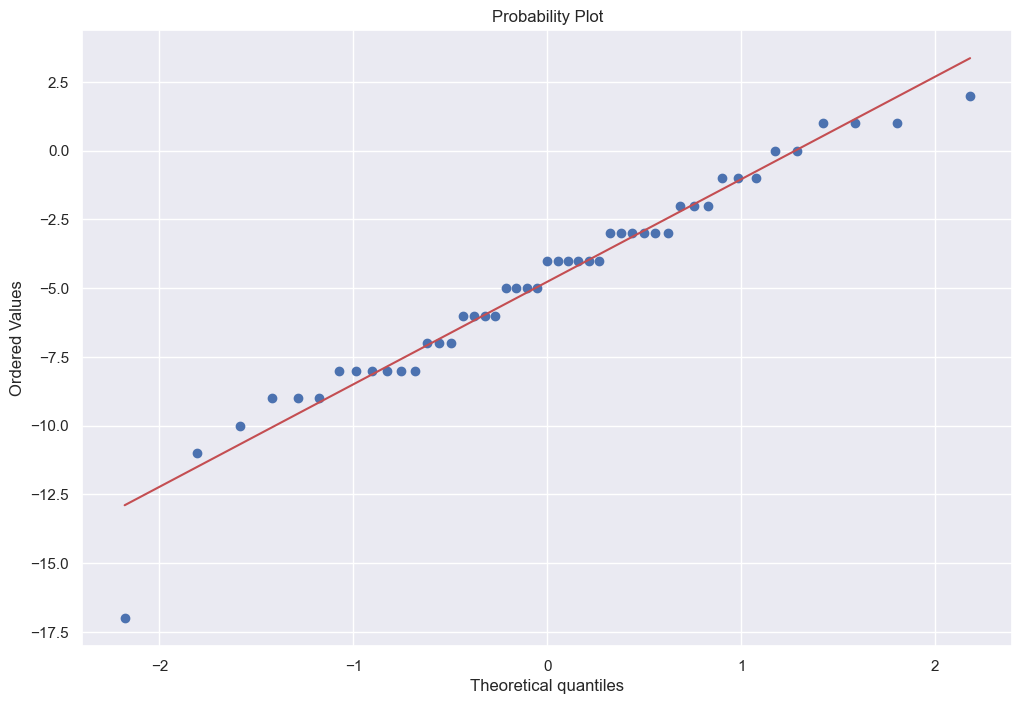

In [12]:
plt.figure(figsize = (12,8))
stats.probplot(crime_data['ExpenditureDiffY10Y0'], dist = "norm", plot=plt)

The original data is in what we call **the wide form**. There is a row of data for each subject, in this case, each US state and the columns are called the **attributes** of the dataset and sometimes are also called **variables**.

In [13]:
crime_data.sample(3)

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10,ExpenditureDiffY10Y0
46,161.8,131,0,13.2,160,631,1071,1,3,102,...,632,1058,1,4,100,40,0,748,150,-17
15,88.0,140,0,12.9,71,632,1029,1,7,100,...,620,1024,1,8,104,25,1,570,182,-3
35,121.6,147,1,13.9,63,560,972,0,23,76,...,571,970,0,24,78,24,1,511,220,1


The extracted data crime_expenditure_0_10 is also in the **wide form**. 

In [14]:
crime_expenditure_0_10.head()

,ExpenditureYear0,ExpenditureYear10
0,69,71
1,55,54
2,47,44
3,46,41
4,106,97


Data in the **wide form** is not an appropriate input for a **box plot**, therefore it must first be converted into data in the **long form**. This can be done with the panda function **melt**.

## [Long vs. Wide Data: What’s the Difference?](https://www.statology.org/long-vs-wide-data/)  

- A wide format contains values that do not repeat in the first column. 
- A long format contains values that repeat in the first column.
- Both datasets contain the same information, they are simply expressed in different formats.
- Most datasets in the real world will be in a wide format because it is easier to interpret.
- if you analyze data, for example by computing averages, it will be easier to use a wide data format.
- if you want to visualize multiple variables in a plot using statistical software such as R you typically must convert your data to a long format to let the software create the plot.

In our case, for example, we have a dataset with two columns: ExpensitureYear0 and ExpensitureYear10.
The rows in the dataset are as many as the US states for which the values for these two **variables** (aka **attributes**) have been recorded.
This **wide format** is unsuitable for a box plot because, in this kind of plot, we want to represent each variable range with a box and place as many boxes side by side as there are variables and, therefore columns in the dataset.

The **wide format** dataset can be converted into a dataset in the **long format** by placing the variables, and therefore the columns (the value of the attributes of the dataset) of the **wide format** dataset, on the first column of the **long format** dataset.  

This operation is called **pivoting** the dataset.   

In our case **pivoting** the dataset means that the ExpensitureYear0 and ExpensitureYear10 will become the only two values in the first column and each ExpensitureYear0 and ExpensitureYear10 will be repeated in the first column as many times as the number of US states.


In [15]:
crime_data_long_form = pd.melt(frame=crime_data,
                               value_vars=['ExpenditureYear0', 'ExpenditureYear10'],
                               var_name= 'Year',
                               value_name='Expenditure')

crime_data_long_form.sample(10)

,Year,Expenditure
15,ExpenditureYear0,71
76,ExpenditureYear10,115
21,ExpenditureYear0,75
77,ExpenditureYear10,77
49,ExpenditureYear10,44
73,ExpenditureYear10,62
87,ExpenditureYear10,101
86,ExpenditureYear10,105
79,ExpenditureYear10,73
27,ExpenditureYear0,72


##  Describe a dataset

The describe function is used to extract the most relevant stats from a dataset.


In [16]:
crime_data.describe()

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10,ExpenditureDiffY10Y0
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,...,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,102.808511,138.574468,0.340426,12.391489,85.000000,561.191489,983.021277,0.191489,36.617021,95.468085,...,565.531915,986.872340,0.212766,37.702128,97.446809,33.361702,0.404255,594.638298,192.957447,-4.765957
std,28.893266,12.567634,0.478975,1.120332,29.718974,40.411814,29.467365,0.397727,38.071188,18.028783,...,37.645284,29.845702,0.413688,39.490734,17.843289,8.414340,0.496053,93.749765,38.756182,3.707881
min,45.500000,119.000000,0.000000,10.000000,45.000000,480.000000,934.000000,0.000000,3.000000,70.000000,...,497.000000,935.000000,0.000000,3.000000,71.000000,15.000000,0.000000,359.000000,126.000000,-17.000000
25%,82.700000,130.000000,0.000000,11.550000,62.500000,530.500000,964.500000,0.000000,10.000000,80.500000,...,538.000000,969.500000,0.000000,11.000000,82.000000,28.000000,0.000000,530.000000,165.000000,-7.500000
50%,103.000000,136.000000,0.000000,12.400000,78.000000,560.000000,977.000000,0.000000,25.000000,92.000000,...,563.000000,983.000000,0.000000,25.000000,93.000000,34.000000,0.000000,615.000000,182.000000,-4.000000
75%,120.650000,146.000000,1.000000,13.200000,104.500000,593.000000,992.000000,0.000000,41.500000,104.000000,...,599.000000,994.000000,0.000000,43.000000,108.500000,39.000000,1.000000,659.500000,229.500000,-2.500000
max,161.800000,177.000000,1.000000,15.100000,166.000000,641.000000,1071.000000,1.000000,168.000000,142.000000,...,641.000000,1079.000000,1.000000,180.000000,143.000000,59.000000,1.000000,748.000000,257.000000,2.000000


In [17]:
crime_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CrimeRate,47.0,102.808511,28.893266,45.5,82.70,103.0,120.65,161.8
Youth,47.0,138.574468,12.567634,119.0,130.00,136.0,146.00,177.0
Southern,47.0,0.340426,0.478975,0.0,0.00,0.0,1.00,1.0
Education,47.0,12.391489,1.120332,10.0,11.55,12.4,13.20,15.1
ExpenditureYear0,47.0,85.000000,29.718974,45.0,62.50,78.0,104.50,166.0
LabourForce,47.0,561.191489,40.411814,480.0,530.50,560.0,593.00,641.0
Males,47.0,983.021277,29.467365,934.0,964.50,977.0,992.00,1071.0
MoreMales,47.0,0.191489,0.397727,0.0,0.00,0.0,0.00,1.0
StateSize,47.0,36.617021,38.071188,3.0,10.00,25.0,41.50,168.0
YouthUnemployment,47.0,95.468085,18.028783,70.0,80.50,92.0,104.00,142.0


The following is therefore a tabular view of what we should expect to see in a box plot.

In [18]:
crime_expenditure_0_10.describe().T

,count,mean,std,min,25%,50%,75%,max
ExpenditureYear0,47.0,85.000000,29.718974,45.0,62.5,78.0,104.5,166.0
ExpenditureYear10,47.0,80.234043,27.961319,41.0,58.5,73.0,97.0,157.0


<Axes: xlabel='Year', ylabel='Expenditure'>

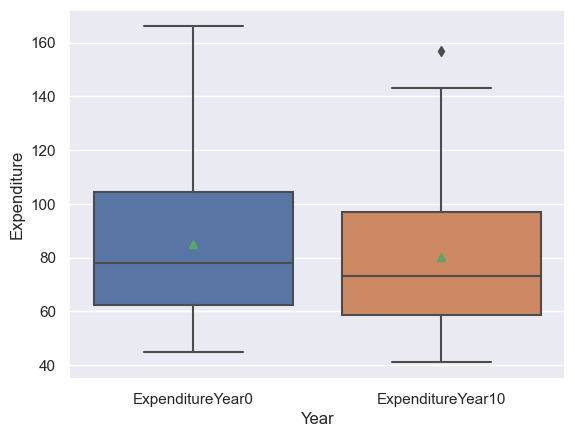

In [19]:
plt.figure(figure=(12,8))
sns.boxplot(y='Expenditure', x='Year', showmeans=True, data = crime_data_long_form)

The box plots show that there seems to be a difference between the average values of the expenditure in Y0 and Y10.
We can use a **paired samples test** to verify whether the difference displayed in the box plots is also statistically significant.
However, we must first use the Levene test to verify whether the variances of the samples can be considered homogenous as this is a condition of the paired samples test.

In [20]:
stats.levene(crime_data['ExpenditureYear0'],crime_data['ExpenditureYear10'])

LeveneResult(statistic=0.12229515954059589, pvalue=0.7273576766203647)

The p-value = 72% > 5% indicates that the null hypothesis cannot be rejected.  
H0: the variances of the samples are homogenous.

It is possble to run the paired samples t-test with these two samples as they satisfy the assumptions to the paired samples t-test.

In [21]:
stats.ttest_rel(crime_data['ExpenditureYear0'],crime_data['ExpenditureYear10'])

TtestResult(statistic=8.811976044793944, pvalue=1.9360060460713323e-11, df=46)

The tiny pvalue=1.9e-11 < 0.05 calculated by the t-test for paired samples indicates that the null hypothesis **can be rejected** and the **alternative hypothesis may be assumed, instead.**

H0: the two related or 
repeated samples have identical average (expected) values.
H1: the two related or repeated samples have average values that are statistically different.  